In [1]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)

import pandas as pd, numpy as np
from shapely.geometry import Polygon
from shapely.geometry import Point
import geopandas

import matplotlib.pyplot as plt

### Load the station coordinates

In [2]:
#col_station = geopandas.GeoSeries([Point([(-122.196868999999, 37.753661)])])
fruit_station = geopandas.GeoSeries([Point([(-122.224175, 37.774836)])])
mp_station = geopandas.GeoSeries([Point([(-122.182405, 37.454745)])])
soto_station = geopandas.GeoSeries([Point([(-118.210061, 34.0437469999999)])])
sl_station = geopandas.GeoSeries([Point([(-118.25518, 34.093765)])])

#col_station = geopandas.GeoDataFrame({'geometry': col_station, 'col_station':['coliseum']})
fruit_station = geopandas.GeoDataFrame({'geometry': fruit_station, 'fruit_station':['fruitvale']})
mp_station = geopandas.GeoDataFrame({'geometry': mp_station, 'mp_station':['menlo']})
soto_station = geopandas.GeoDataFrame({'geometry': soto_station, 'soto_station':['soto']})
sl_station = geopandas.GeoDataFrame({'geometry': sl_station, 'sl_station':['silver lake']})

sl_station

,geometry,sl_station
0,POINT (-118.25518 34.093765),silver lake


In [3]:
print(fruit_station.crs)

fruit_station.crs = {'init': 'epsg:4269'}
mp_station.crs = {'init': 'epsg:4269'}
soto_station.crs = {'init': 'epsg:4269'}
sl_station.crs = {'init': 'epsg:4269'}
 
print(fruit_station.crs)

mtc_crs = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '
fruit_station = fruit_station.to_crs(mtc_crs)
mp_station = mp_station.to_crs(mtc_crs)
soto_station = soto_station.to_crs(mtc_crs)
sl_station = sl_station.to_crs(mtc_crs)

print(fruit_station.crs)

None
{'init': 'epsg:4269'}
+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 


### Load the parcel shapefiles with zoning information attached

In [130]:
mp_pz = geopandas.read_file('GIS/Parcel_Zoning/mp_pz.shp')
fruit_pz = geopandas.read_file('GIS/Parcel_Zoning/fruit_pz.shp')
la_pz = geopandas.read_file('GIS/Parcel_Zoning/la_pz.shp')

In [131]:
fruit_pz = fruit_pz.set_geometry('geometry')
mp_pz = mp_pz.set_geometry('geometry')
la_pz = la_pz.set_geometry('geometry')

In [132]:
print(fruit_pz.crs)

fruit_pz = fruit_pz.to_crs(mtc_crs)
mp_pz = mp_pz.to_crs(mtc_crs)
la_pz = la_pz.to_crs(mtc_crs)

print(fruit_pz.crs)

{'init': 'epsg:4269'}
+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 


### Calculate distance of parcel centroids from the station coordinates

In [133]:
fruit_pz['dist_station'] = fruit_pz['geometry'].centroid.distance(fruit_station.iloc[0,0])
mp_pz['dist_station'] = mp_pz['geometry'].centroid.distance(mp_station.iloc[0,0])

soto_pz = la_pz[la_pz['name']=='Soto Station'].reset_index()
sl_pz = la_pz[la_pz['name']=='Allesandro / Oak Glen'].reset_index()

soto_pz['dist_station'] = soto_pz['geometry'].centroid.distance(soto_station.iloc[0,0])
sl_pz['dist_station'] = sl_pz['geometry'].centroid.distance(sl_station.iloc[0,0])

mp_pz.head(2)

,APAGE,APN,APN_FLAG,BLOCK,BOOK,LOT,SBE_NO,SUBLOT,PARCEL_ID,PERIMETER,...,lon,index_righ,apn_1,fld_firm_z,gp_values1,gpz_gen_pl,gpz_z_labe,zone_base,geometry,dist_station
0,48,114480020,V,0,114,020,None,None,4013174,382.85,...,-122.182405,2826.0,114480999,X,Residential Medium Density,RM,R3,Multi-Family Residential,"POLYGON ((572420.8779099183 4144634.749978957,...",998.110031
1,48,114480010,V,0,114,010,None,None,4013174,382.85,...,-122.182405,2826.0,114480999,X,Residential Medium Density,RM,R3,Multi-Family Residential,"POLYGON ((572420.8779099183 4144634.749978957,...",998.110031


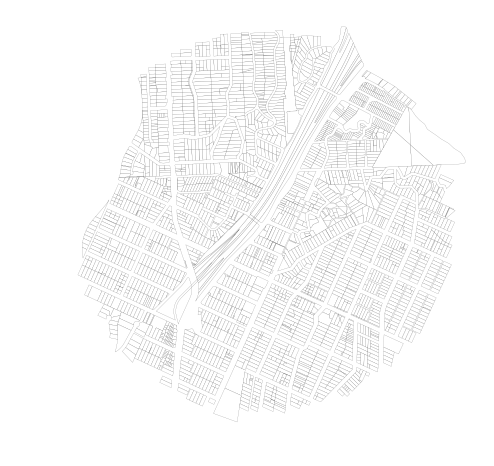

In [134]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = sl_pz[sl_pz['dist_station'] <= 804.67].plot(ax = ax, color='white', edgecolor='black', linewidth=.1)
#DPI=300
ax.set_axis_off()
#ax.set_title('Fruitvale')
plt.show()

In [135]:
fruit_pz = fruit_pz[fruit_pz['dist_station'] <= 804.67]
mp_pz = mp_pz[mp_pz['dist_station'] <= 804.67]
soto_pz = soto_pz[soto_pz['dist_station'] <= 804.67]
sl_pz = sl_pz[sl_pz['dist_station'] <= 804.67]

### Load station half mile radius to conduct a difference operations

In [13]:
station_half = geopandas.read_file('case_studies/buffers/station_half.shp')

station_half.head()

,key,name,lat,lon,geometry
0,Bay Area Rapid TransitFTVL,Fruitvale BART,37.774836,-122.224175,POLYGON ((-122.2150386347632 37.77477549032064...
1,Caltrain70162,Menlo Park Caltrain,37.454745,-122.182405,POLYGON ((-122.1733078069398 37.45468171040526...
2,Metro - Los Angeles80405,Soto Station,34.043747,-118.210061,POLYGON ((-118.2013736755388 34.04340743791552...
3,Metro - Los Angeles80209,Wilshire / Vermont Station,34.062701,-118.290082,POLYGON ((-118.2813917290286 34.06236693017063...
4,Metro - Los Angeles89,Allesandro / Oak Glen,34.093765,-118.255180,POLYGON ((-118.2464869954922 34.09342819428262...


In [14]:
print(station_half.crs)
station_half = station_half.to_crs(mtc_crs)
print(station_half.crs)

{'init': 'epsg:4269'}
+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 


In [124]:
fruit_half = station_half.loc[0:0,:]
mp_half = station_half.loc[1:1,:]
soto_half = station_half.loc[2:2,:]
sl_half = station_half.loc[4:4,:]
fruit_half

,key,name,lat,lon,geometry
0,Bay Area Rapid TransitFTVL,Fruitvale BART,37.774836,-122.224175,"POLYGON ((569128.295771525 4181116.449982825, ..."


In [136]:
fruit_streets = geopandas.overlay(fruit_half, fruit_pz, how='difference').reset_index()
mp_streets = geopandas.overlay(mp_half, mp_pz, how='difference').reset_index()
soto_streets = geopandas.overlay(soto_half, soto_pz, how='difference').reset_index()
sl_streets = geopandas.overlay(sl_half, sl_pz, how='difference').reset_index()

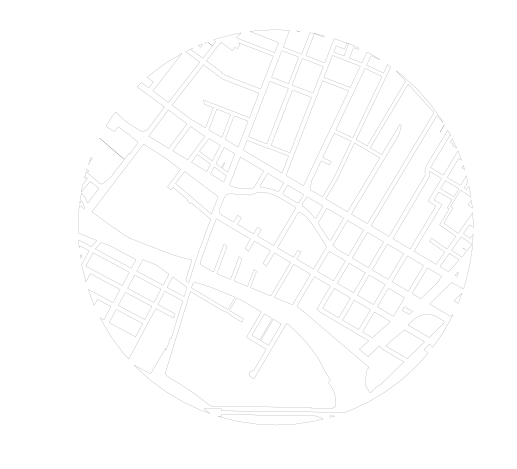

In [137]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = fruit_streets.plot(ax = ax, color='white', edgecolor='black', linewidth=.1)
#DPI=300
ax.set_axis_off()
#ax.set_title('Fruitvale')
plt.show()

In [138]:
fruit_streets['Fruitvale'] = fruit_streets.area * 10.7639
mp_streets['Menlo Park'] = mp_streets.area * 10.7639
soto_streets['Boyle Heights'] = soto_streets.area * 10.7639
sl_streets['Silver Lake'] = sl_streets.area * 10.7639

In [139]:
street_areas = pd.concat([fruit_streets.loc[:,'Fruitvale'], mp_streets.loc[:,'Menlo Park'],
                          soto_streets.loc[:,'Boyle Heights'], sl_streets.loc[:,'Silver Lake']], axis=1)

street_areas['zone_base'] = 'Streets'

street_areas = street_areas.set_index('zone_base')

street_areas

,Fruitvale,Menlo Park,Boyle Heights,Silver Lake
zone_base,,,,
Streets,6.966172e+06,4.813379e+06,5.981277e+06,5.791978e+06


### Calculate parcel areas in square and then sum by zoning type

In [165]:
fruit_pz['parcel_area'] = fruit_pz.area * 10.7639
mp_pz['parcel_area'] = mp_pz.area * 10.7639
soto_pz['parcel_area'] = soto_pz.area * 10.7639
sl_pz['parcel_area'] = sl_pz.area * 10.7639

fruit_pz.head(2)

,apn,apn_sort,book,centroid_x,centroid_y,clca_categ,comments,date_creat,date_updat,fid_parcel,...,lat,lon,index_righ,BASEZONE,OVERLAY,ZNLABEL,zone_base,geometry,dist_station,parcel_area
5,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,67753.0,...,37.774836,-122.224175,30.0,RM-3,None,RM-3,Multi-Family Residential,"POLYGON ((568597.4760071123 4181826.206235491,...",756.169981,3804.304088
6,33-2136-27-1,033 213602701,33,6.065076e+06,2.110309e+06,None,None,2004-06-07,2004-06-07,67742.0,...,37.774836,-122.224175,27.0,RM-2,None,RM-2,Multi-Family Residential,"POLYGON ((568854.1890550074 4181468.343976337,...",622.041286,5958.258968


##### There was something funky going on in Menlo Park, especially with multi-family parcels being duplicated so dropping dupes. Note that it is not for APN but for PARCEL_ID since there are still unique APNs. Couldn't figure out which one corresponded to the Master Parcel

In [180]:
mp_pz2 = mp_pz.drop_duplicates('PARCEL_ID')

In [183]:
fruit_areas = pd.DataFrame(fruit_pz['parcel_area'].groupby(fruit_pz['zone_base']).sum())
fruit_areas.rename(columns={'parcel_area':'Fruitvale'}, inplace=True)

mp_areas = pd.DataFrame(mp_pz2['parcel_area'].groupby(mp_pz2['zone_base']).sum())
mp_areas.rename(columns={'parcel_area':'Menlo Park'}, inplace=True)

soto_areas = pd.DataFrame(soto_pz['parcel_area'].groupby(soto_pz['zone_base']).sum())
soto_areas.rename(columns={'parcel_area':'Boyle Heights'}, inplace=True)

sl_areas = pd.DataFrame(sl_pz['parcel_area'].groupby(sl_pz['zone_base']).sum())
sl_areas.rename(columns={'parcel_area':'Silver Lake'}, inplace=True)

In [184]:
land_use_areas = pd.merge(pd.merge(pd.merge(fruit_areas,mp_areas,how='outer',on='zone_base'),
                                   soto_areas,how='outer',on='zone_base'),
                          sl_areas,how='outer',on='zone_base')

land_use_areas

,Fruitvale,Menlo Park,Boyle Heights,Silver Lake
zone_base,,,,
Commercial,5.148066e+06,NaN,3.041356e+06,4.739418e+05
Industrial,2.387307e+06,NaN,NaN,NaN
Mix,1.384935e+06,NaN,NaN,NaN
Multi-Family Residential,5.307162e+06,4.514843e+06,9.544137e+06,8.348196e+06
Open Space,1.530772e+05,4.188557e+05,7.442895e+05,5.622781e+05
TOD,7.494402e+05,NaN,NaN,NaN
El Camino Real/Downtown Specific Plan,NaN,4.148277e+06,NaN,NaN
Office,NaN,2.772524e+06,NaN,NaN
Public Facilities,NaN,1.178590e+06,2.774460e+06,1.394796e+06


In [185]:
land_use_areas = land_use_areas.append(street_areas, ignore_index=False, sort=False)

In [186]:
land_use_areas.to_csv('land_use_areas.csv')